<a href="https://colab.research.google.com/github/JoseBatista2010/ML2023-Jose-Batista/blob/master/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
fashion_train = pd.read_csv('/content/drive/MyDrive/UFC/2023_1/Machine_Learning/fashion_mnist/fashionmnist/fashion-mnist_train.csv')

In [ ]:
fashion_test = pd.read_csv('/content/drive/MyDrive/UFC/2023_1/Machine_Learning/fashion_mnist/fashionmnist/fashion-mnist_test.csv')

In [ ]:
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

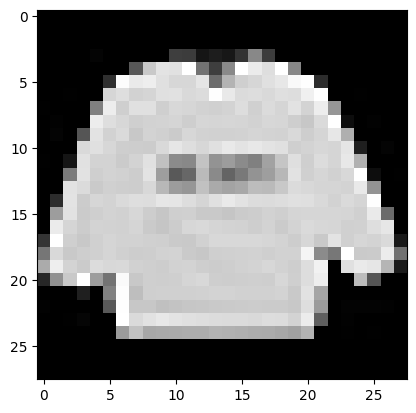

In [ ]:
# Imprimindo um objeto do dataset
plt.imshow(fashion_train.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = fashion_train.drop('label', axis=1)
y = fashion_train['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
(X_train, valData, y_train, valLabels) = train_test_split(X_train, y_train,
test_size=0.1, random_state=84)

In [ ]:
print("training data points: {}".format(len(y_train)))
print("Val data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(y_test)))

training data points: 43200
Val data points: 4800
testing data points: 12000


In [ ]:
kVals = range(1, 30)
accuracies = []

### Utilize o KNeighborsClassifier do scikit learn para criar o seu classificador
https://scikit-learn.org/stable/modules/neighbors.html

In [ ]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
        model.fit(X_train, y_train)
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=84.52%
k=2, accuracy=84.83%
k=3, accuracy=85.02%
k=4, accuracy=85.44%
k=5, accuracy=85.60%
k=6, accuracy=85.52%
k=7, accuracy=85.27%
k=8, accuracy=85.38%
k=9, accuracy=85.31%
k=10, accuracy=85.10%
k=11, accuracy=85.17%
k=12, accuracy=85.15%
k=13, accuracy=84.90%
k=14, accuracy=84.71%
k=15, accuracy=84.67%
k=16, accuracy=84.92%
k=17, accuracy=84.73%
k=18, accuracy=84.69%
k=19, accuracy=84.67%
k=20, accuracy=84.44%
k=21, accuracy=84.40%
k=22, accuracy=84.33%
k=23, accuracy=84.25%
k=24, accuracy=84.27%
k=25, accuracy=84.10%
k=26, accuracy=84.08%
k=27, accuracy=84.10%
k=28, accuracy=84.08%
k=29, accuracy=84.02%


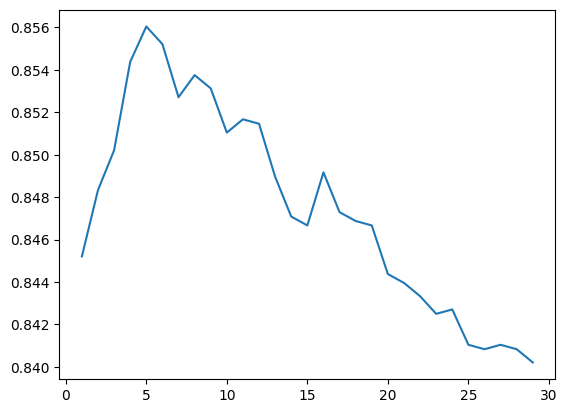

In [ ]:
plt.plot(kVals, accuracies)

In [ ]:
valData

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47319,0,0,0,0,0,0,0,0,0,41,...,0,0,0,0,1,0,0,0,0,0
18825,0,0,0,0,0,0,0,1,0,3,...,44,22,8,0,3,0,0,0,0,0
37633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54925,0,0,0,0,0,0,0,0,0,0,...,2,0,0,175,190,198,64,0,0,0
2080,0,0,0,0,0,0,0,0,0,0,...,52,0,0,0,0,0,0,0,0,0
42303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12709,0,0,1,0,0,0,0,0,0,0,...,65,72,98,12,0,3,0,0,0,0


In [ ]:
model.predict(valData[0:1:])

array([0])

In [ ]:
valData[0:1:]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
47319,0,0,0,0,0,0,0,0,0,41,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
valLabels[0]

2